In [8]:
import os, sys,subprocess
from subprocess import Popen

first_file="empty_S316_L008_R1_001.fastq.gz"
second_file = "empty_S316_L008_R2_001.fastq.gz"

def uncompress(filename):
    file_handle = os.path.isfile(filename)
    print (file_handle)
    if(file_handle and filename[len(filename)-2:len(filename)]=="gz"):
        print ("filename is gz")
        #test if there is an uncompressed version
        is_uncompressed = os.path.isfile(filename[len(filename)-3:len(filename)])
        if(is_uncompressed):
            print("uncompressed exists")
        else:
            print("uncompressing")
            return_code = subprocess.Popen("gunzip"+" "+filename,shell=True)
            print (return_code) # this doesnt mean the command is complete!
            
uncompress(first_file)
#uncompress(second_file) no disk space


True
filename is gz
uncompressing


In [12]:
!wc -l empty_S316_L008_R1_001.fastq
1242098928

^C


In [4]:
file_name="empty_S316_L008_R1_001.fastq"
import matplotlib.pyplot as plt

N_pos_dict={}
nuc_dict={}
low_phred={}
def process_header(line):
    """
    """
    #print("header:",line)
    

def process_DNA(line):
    """
    """
    #print("DNA:",line)
    for i,j in enumerate(list(line)):
        if(j=='N'):
            #print("DNA bad pos:",i)
            if not i in N_pos_dict:
                N_pos_dict[i]=1
            else:
                N_pos_dict[i] +=1
        #stats for nucleotides
        if not j in nuc_dict:
            nuc_dict[j] = 1
        else:
            nuc_dict[j]+=1
        
        
def do_nothing(read_line):
    """
    """
    #print ('do_nothing')

def process_phred(line):
    """
    """
    #print("quality:",line)
    plot_quality=[ord(x)-33 for x in line]
    for i,j in enumerate (plot_quality):
        if j<20:
            if not i in low_phred:
                low_phred[i]=1
            else:
                low_phred[i] +=1
    #print(plot_quality)
    #plt.plot(plot_quality)
    #plt.show()
    #plt.gcf().clear()

num_read = 0;
nucleotide_set = {'A','G','T','C','N'}
import time
startTime = time.time()
with open(file_name) as file_open:
    for read_line in file_open:
        if(num_read%100000000==0):
            print(num_read)
        #read_line = file_open.readline().strip()
        #print("line num:",num_read,read_line)
        num_read+=1
        if(num_read>0 and num_read<1000):
            function_lookup = {0:(process_phred,read_line),1:(process_header,read_line),2:(process_DNA,read_line),3:(do_nothing,read_line)}
            func = function_lookup.get(num_read%4)
            #print(func[0],func[1])
            func[0](read_line)
endTime=time.time()
print("elpased:",(endTime-startTime))
for i in N_pos_dict:
    print(i,N_pos_dict[i])
for i in nuc_dict:
    print(i,nuc_dict[i])
for i in low_phred:
    print(i,low_phred[i])

0
100000000
200000000
300000000
400000000
500000000
600000000
700000000
800000000
900000000
1000000000
1100000000
1200000000
('elpased:', 447.8728241920471)
(3, 81)
(131, 15)
(39, 124)
(41, 58)
(47, 138)
(48, 19)
(146, 1)
(51, 24)
(149, 94)
(137, 4)
(25, 30)
('A', 12300)
('C', 6540)
('G', 6466)
('\n', 250)
('N', 588)
('T', 11856)
(0, 10)
(1, 14)
(2, 16)
(3, 86)
(4, 4)
(5, 4)
(6, 2)
(7, 4)
(9, 3)
(10, 4)
(11, 2)
(12, 2)
(13, 8)
(14, 14)
(15, 3)
(16, 9)
(17, 8)
(18, 6)
(19, 18)
(20, 10)
(21, 8)
(22, 7)
(23, 7)
(24, 16)
(25, 47)
(26, 8)
(27, 7)
(28, 13)
(29, 22)
(30, 16)
(31, 28)
(32, 21)
(33, 26)
(34, 12)
(35, 16)
(36, 18)
(37, 13)
(38, 9)
(39, 132)
(40, 10)
(41, 74)
(42, 12)
(43, 14)
(44, 10)
(45, 11)
(46, 14)
(47, 145)
(48, 28)
(49, 5)
(50, 2)
(51, 33)
(52, 3)
(53, 9)
(54, 3)
(55, 11)
(56, 8)
(57, 4)
(58, 12)
(59, 5)
(60, 4)
(61, 7)
(62, 6)
(63, 10)
(64, 5)
(65, 6)
(66, 14)
(67, 10)
(68, 12)
(69, 5)
(70, 8)
(71, 8)
(72, 6)
(73, 9)
(74, 4)
(75, 12)
(76, 10)
(77, 6)
(78, 12)
(79, 15)
(80

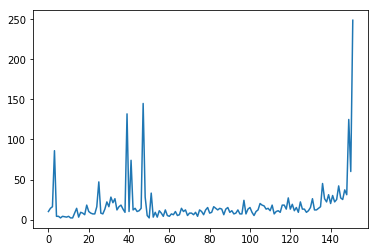

In [35]:
low_phred.values()
low_phred.keys()
#length of read is 151
plt.plot(low_phred.keys(),low_phred.values())
plt.show()
#y = position of read
#x axis number of reads where there is phred < 20. 
#not that bad, only 100-150 reads which we can discard. Is this worth cleaning? out of 1B reads. 
#

In [26]:
import pickle

def save(obj, name ):
    with open(name, 'wb+') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load(name ):
    with open( name , 'rb') as f:
        return pickle.load(f)

In [27]:
save(low_phred,"lp.pkl")
newobj = load("lp.pkl")
print newobj

{0: 10, 1: 14, 2: 16, 3: 86, 4: 4, 5: 4, 6: 2, 7: 4, 9: 3, 10: 4, 11: 2, 12: 2, 13: 8, 14: 14, 15: 3, 16: 9, 17: 8, 18: 6, 19: 18, 20: 10, 21: 8, 22: 7, 23: 7, 24: 16, 25: 47, 26: 8, 27: 7, 28: 13, 29: 22, 30: 16, 31: 28, 32: 21, 33: 26, 34: 12, 35: 16, 36: 18, 37: 13, 38: 9, 39: 132, 40: 10, 41: 74, 42: 12, 43: 14, 44: 10, 45: 11, 46: 14, 47: 145, 48: 28, 49: 5, 50: 2, 51: 33, 52: 3, 53: 9, 54: 3, 55: 11, 56: 8, 57: 4, 58: 12, 59: 5, 60: 4, 61: 7, 62: 6, 63: 10, 64: 5, 65: 6, 66: 14, 67: 10, 68: 12, 69: 5, 70: 8, 71: 8, 72: 6, 73: 9, 74: 4, 75: 12, 76: 10, 77: 6, 78: 12, 79: 15, 80: 8, 81: 9, 82: 16, 83: 14, 84: 12, 85: 14, 86: 13, 87: 6, 88: 13, 89: 15, 90: 9, 91: 11, 92: 7, 93: 8, 94: 12, 95: 7, 96: 7, 97: 24, 98: 7, 99: 13, 100: 15, 101: 9, 102: 5, 103: 10, 104: 12, 105: 20, 106: 18, 107: 17, 108: 13, 109: 14, 110: 11, 111: 18, 112: 7, 113: 10, 114: 11, 115: 9, 116: 18, 117: 18, 118: 13, 119: 27, 120: 13, 121: 19, 122: 11, 123: 15, 124: 9, 125: 22, 126: 13, 127: 13, 128: 9, 129: 11

In [40]:
import gzip
filename = "empty_S316_L008_R2_001.fastq.gz"

import gzip
num_read=0
N_pos_dict={}
nuc_dict={}
low_phred={}

startTime = time.time()
with gzip.open(filename, 'rb') as f:
    for line in f:
        #print (line)
        if(num_read%100000000==0):
            print(num_read)
        #read_line = file_open.readline().strip()
        #print("line num:",num_read,read_line)
        num_read+=1
        if(num_read>0 and num_read<1000):
            function_lookup = {0:(process_phred,read_line),1:(process_header,read_line),2:(process_DNA,read_line),3:(do_nothing,read_line)}
            func = function_lookup.get(num_read%4)
            #print(func[0],func[1])
            func[0](read_line)
endTime=time.time()
print("elpased:",(endTime-startTime))
for i in N_pos_dict:
    print(i,N_pos_dict[i])
for i in nuc_dict:
    print(i,nuc_dict[i])
for i in low_phred:
    print(i,low_phred[i])

0
100000000
200000000
300000000
400000000
500000000
600000000
700000000
800000000
900000000
1000000000
1100000000
1200000000
('elpased:', 3459.675316095352)
('A', 3000)
('#', 250)
('\n', 250)
('F', 8750)
('J', 10750)
('-', 8500)
('7', 3250)
('<', 3250)
(0, 249)
(131, 249)
(132, 249)
(133, 249)
(134, 249)
(135, 249)
(137, 249)
(139, 249)
(140, 249)
(141, 249)
(142, 249)
(143, 249)
(144, 249)
(145, 249)
(148, 249)
(149, 249)
(150, 249)
(151, 249)
(41, 249)
(46, 249)
(61, 249)
(62, 249)
(70, 249)
(78, 249)
(100, 249)
(105, 249)
(107, 249)
(110, 249)
(111, 249)
(113, 249)
(115, 249)
(116, 249)
(118, 249)
(120, 249)
(124, 249)
(125, 249)
